In [2]:
##  基础函数库
import numpy as np 
from sklearn.datasets import make_blobs
## 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入逻辑回归模型函数
from sklearn.svm  import SVC

### 可视化决策边界

In [3]:
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

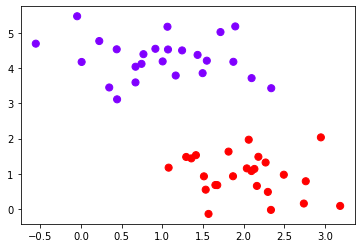

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plt.show()

### 利用contour绘制决策边界，该函数是专门用来绘制等高线的
contour参数
+ [X，y]，选填,一般通过np.meshgrid函数来建立，不填写默认是[range(Z.shape[1]),range(Z.shape[0])]
+ Z 必填，平面上所有的点对应的高度
+ levels:默认显示所有等高线，填写数组或者列表，则在指定高度级别绘制等高线，必须是递增列表

决策边界$wx+b=0$，在平面上找出所有到决策边界距离为0的点相连，就是决策边界了，两个超平面同理

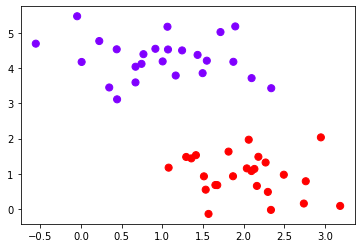

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax=plt.gca() # 获取当前子图，不存在则创建新的
xlim = ax.get_xlim()
ylim = ax.get_ylim()
axisx= np.linspace(xlim[0],xlim[1],30)
axisy= np.linspace(ylim[0],ylim[1],30)


In [ ]:
from sklearn.model_selection import cross_validate

In [6]:
axisx,axisy = np.meshgrid(axisy,axisx)

In [7]:
axisy.shape

(30, 30)

In [8]:
pos = np.vstack([axisx.ravel(),axisy.ravel()]).T

In [9]:
pos.shape # 得到900个网格点

(900, 2)

In [32]:
np.vstack([[1,2,3,4],[2,2,2,2]]).T

array([[1, 2],
       [2, 2],
       [3, 2],
       [4, 2]])

In [29]:
import numpy 
np.c_[[1,2,3,4],[2,2,2,2]]

array([[1, 2],
       [2, 2],
       [3, 2],
       [4, 2]])

In [10]:
clf=SVC(kernel='linear').fit(X,y)
Z = clf.decision_function(pos).reshape(axisx.shape)
# 会返回pos的每个点到决策边界的距离

(-0.41872382476349596, 5.754870487889891)

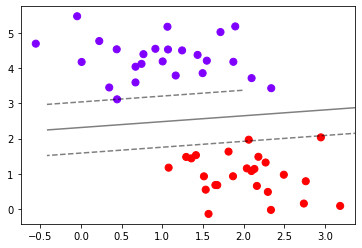

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow') # 获取当前子图，不存在则创建新的
plt.contour(axisx,axisy,Z,colors='k',
           levels=[-1,0,1],# 画三条等高线，分别为Z=-1,Z=0,Z=1
           # 0就是表示选出这900个点中，Z=0的所有点，然后连线
           alpha=0.5,
           linestyles=['--','-','--']
          )
plt.xlim(xlim)
plt.ylim(ylim)

画线的第二种方法

In [12]:
## 构造数据集
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

## 调用SVC模型 （支持向量机分类）
svc = SVC(kernel='linear')
#参数：C：正则化参数，C越小包容性越高，容易欠拟合，C越大，敏感度越高，容易过拟合
#选择核函数kernel='rbf' 高斯核函数

svc = svc.fit(x_fearures, y_label)
## 查看其对应模型的w
print('the weight of svc:',svc.coef_)
## 查看其对应模型的w0
print('the intercept(w0) of svc:',svc.intercept_)

the weight of svc: [[0.33364706 0.33270588]]
the intercept(w0) of svc: [-0.00031373]


In [13]:
y_train_pred = svc.predict(x_fearures)

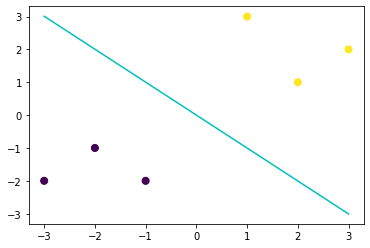

In [14]:
# 最佳函数
x_range = np.linspace(-3, 3)

w = svc.coef_[0]
a = -w[0] / w[1]#参数向量和决策边界90度正交
y_3 = a*x_range - (svc.intercept_[0]) / w[1]#这个边界线怎么来的？

# 可视化决策边界
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.plot(x_range, y_3, '-c')
#-c只是一个线的风格
plt.show()


1. 参数：
+ kernal:
    + linear:线性
    + poly：偏线性
    + sigmiod：非线性
    + rbf：偏非线性，泛用性最高，基本用这个就行，除了线性
+ C：控制惩罚力度，默认为1，相当于正则化lambda的导数
+ class_weight:样本权重，默认None，当样本不均衡时，会倾向于多数类。可以使用{'label1':value1,'label2':value2}的方式告知比例，
    让模型能够平衡权重，也可以直接使用balanced，以类别样本比例作为权重。
    
    有时调整准确度反而会降低，但是置信度升高了，这是由于为了尽可能的使少数类被分类正确，而导致一部分正数类被分类正确,有点像是宁可错杀一千，不可放过一个，所以是否使用取决于目的。
+ probability:默认为False，True则表示启用概率估计，会减慢模型运算速度，但predcit_proba和predcit_log_proba会生效，可以得到真正的概率，但是因为很慢一般不用
2. 属性：
+ clf.support_vectors_ #返回支持向量即对应的点
+ clf.decision_function:点离决策边界的距离，越远则被分类正确的置信度越高

当明确知道是线性数据，想加快运行速度，可以使用poly，然后选择参数degree=1


### 乳腺癌实例

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
import datetime

In [16]:
data=load_breast_cancer()
X=data.data
y=data.target

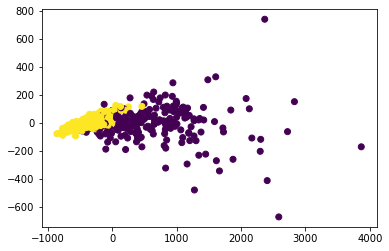

In [17]:
from sklearn.decomposition import PCA
X_dr=PCA(n_components=2).fit_transform(X)
plt.scatter(X_dr[:,0],X_dr[:,1],c=y)
plt.show() # 观察前两个特征的可视化，或者用PCA降维再可视化

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=420)

In [19]:
Kernel = ['linear','rbf']
for kernel in Kernel:
    time0=time()
    clf=SVC(kernel=kernel,gamma='auto').fit(X_train,Y_train)
    print(kernel,clf.score(X_test,Y_test))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

linear 0.9298245614035088
00:00:336024
rbf 0.5964912280701754
00:00:021001


In [20]:
# 原因
pd.DataFrame(X).describe()
# 存在严重的量纲不统一问题，偏态，故进行标准化

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler().fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_s,y,test_size=0.3,random_state=420)
for kernel in Kernel:
    time0=time()
    clf=SVC(kernel=kernel,gamma='auto').fit(X_train,Y_train)
    print(kernel,clf.score(X_test,Y_test))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

linear 0.9766081871345029
00:00:006997
rbf 0.9707602339181286
00:00:004999


### 显然进行归一化效果有了极大的提升，因为支持向量机对于距离进行计算，优先进行标准化非常重要

看起来rbf和linear很接近，但rbf仍有参数能进行调整，而linear不行，故选择使用rbf，并进行调参（gamma，C）

In [22]:
svc = SVC(kernel=kernel,gamma='auto',probability=True).fit(X_train,Y_train)

In [23]:
y_pred=svc.predict(X_test)

In [24]:
from sklearn.metrics import roc_curve

In [25]:
FPR, recall,threholds = roc_curve(Y_test,svc.predict_proba(X_test)[:,1])

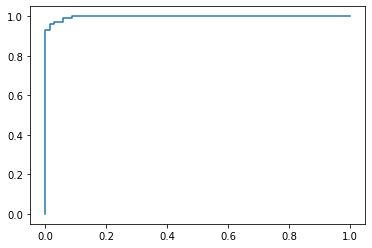

In [26]:
plt.plot(FPR,recall)

In [28]:
from sklearn.metrics import roc_auc_score as AUC
AUC(Y_test,svc.predict_proba(X_test)[:,1])

0.9973003694231316